<a href="https://colab.research.google.com/github/SSP-31/ML_24/blob/main/Spam_mail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project : Spam Guardian

---

07.07.2025

Dependencies installments:

In [ ]:
# Optional installs
!pip install pandas matplotlib seaborn scikit-learn


Step 1: Load the Dataset

In [ ]:
import pandas as pd

# Load directly from the web
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_table(url, header=None, names=['label', 'message'])

# Show first 5 rows
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Step 2: Preprocess the Text

In [ ]:
import string

def clean_text(msg):
    msg = msg.lower()
    msg = ''.join([char for char in msg if char not in string.punctuation])
    return msg

df['clean_msg'] = df['message'].apply(clean_text)
df[['message', 'clean_msg']].head()


,message,clean_msg
0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


Step 3: Convert Text to Numbers.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['clean_msg'])

# Labels: ham=0, spam=1
df['label_num'] = df['label'].map({'ham':0, 'spam':1})
y = df['label_num']


Step 4: Train Your ML Model.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

Step 5 : Evaluate the model.

Accuracy: 0.9820627802690582
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.93      0.94      0.93       149

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



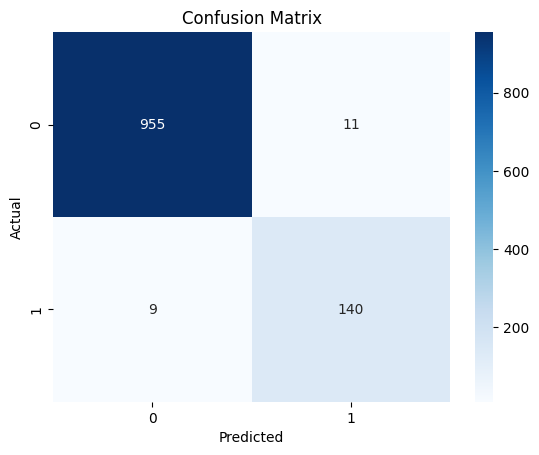

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Graph:

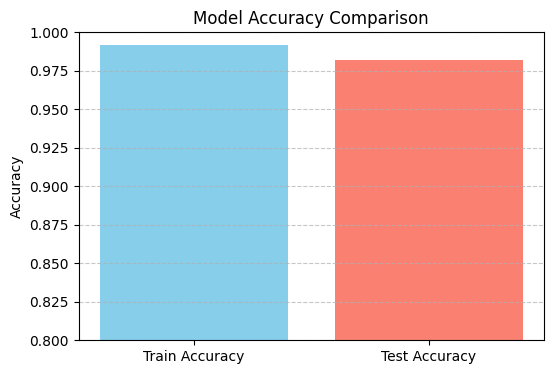

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Get accuracy scores
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))

# Plotting the accuracies
plt.figure(figsize=(6,4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['skyblue', 'salmon'])
plt.ylim(0.8, 1.0)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Rechecking it.

In [ ]:
#Optional
def predict_spam(msg):
    msg_clean = clean_text(msg)
    msg_vec = vectorizer.transform([msg_clean])
    pred = model.predict(msg_vec)[0]
    return "SPAM 🚫" if pred else "HAM ✅"

# Example
print(predict_spam("Win a free iPhone now!!! Click here!"))
print(predict_spam("Hey, are we still on for lunch?"))


SPAM 🚫
HAM ✅
